# KNN (K Nearest Neighbours)Classification

In [1]:
import pandas as pd 
from sklearn.datasets import load_iris
iris=load_iris()

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df.shape

(150, 4)

In [6]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [9]:
df0=df[:50]
df1=df[50:100]
df2=df[100:]


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

Sepal Length vs Sepal Width (setosa vs Versicolor)

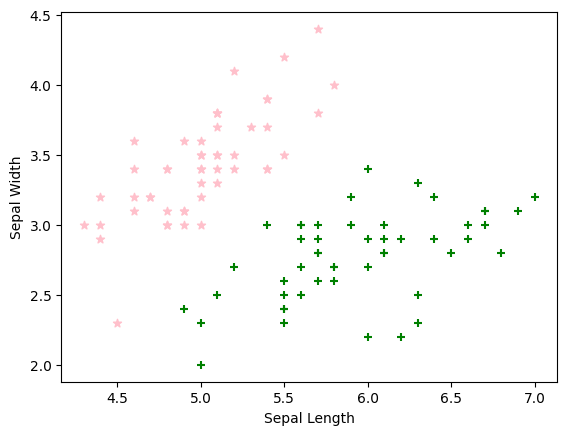

In [13]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color="pink",marker="*")
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color="green",marker="+")            

In [14]:
from sklearn.model_selection import train_test_split


In [16]:
X=df.drop(['target'],axis='columns')
y=df.target

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [18]:
len(X_train)

120

In [19]:
len(X_test)

30

# creating k nearest neighbour classifier

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=10)

In [23]:
knn.score(X_test,y_test)

0.9666666666666667

## try to figure out best value of k can use gridsearchcv and k-fold to figure our the optimal value of k

In [25]:
from sklearn.metrics import confusion_matrix
y_pred=knn.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

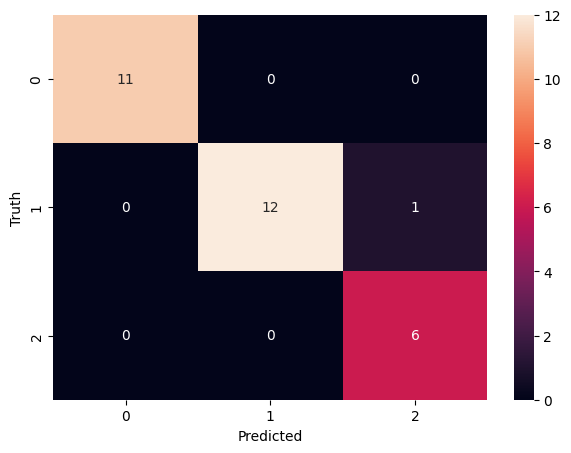

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

